In [2]:
import cv2
from patchify import patchify
from matplotlib import pyplot as plt

from config import original_images, data_path
from core import split, clahe, hist_equalization, grid_layover

In [4]:
original_images

[]

### Split SEM images

In [3]:
img = cv2.imread(original_images[150], 0)
plt.imshow(img, cmap="bone")
img.shape

IndexError: list index out of range

### Histogram adjustment
Before anything, the histogram is adjusted using CLAHE method

True

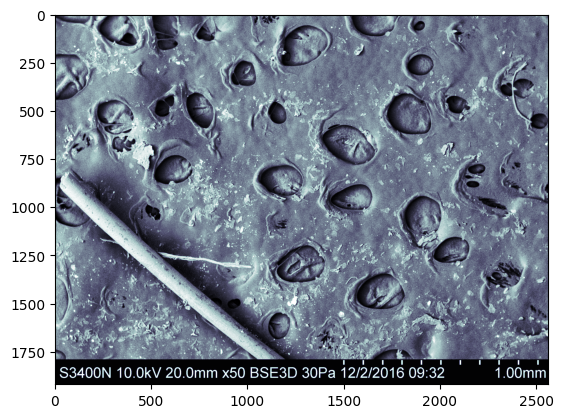

In [14]:
img_adjusted = clahe(img)
plt.imshow(img_adjusted, cmap="bone")
cv2.imwrite(str(data_path/"adjusted"/"16-6754_46579_RSFA_50x.tif"), img_adjusted)

Since the biggest common factor of 1920 and 2560 is 320, so the image can be devided to smaller images with 320*320 pixels

In [3]:
splitted_img = patchify(img, (320, 320), step=320)
splitted_img.shape

(6, 8, 320, 320)

Therefore, each image is splitted to 48 smaller images 6 row and 8 column tiles such as the following image:

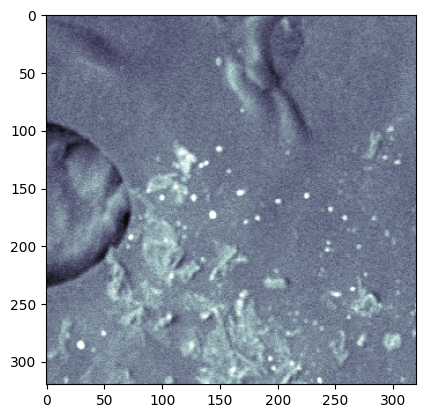

In [7]:
plt.imshow(splitted_img[2, 2], cmap="bone")

Now, the splitted images are saved in a different folder

In [20]:
# original image spllit
split(original_images[150], data_path/"splitted")

In [18]:
# CLAHE histogram adjusted images split
split(str(data_path/"adjusted"/"16-6754_46579_RSFA_50x.tif"), data_path/"splitted_adjusted")